In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [4]:
data = pd.read_csv('data/clean_data.csv')
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_2,tenure_3,tenure_4,tenure_5
0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,29.8500,29.8500,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,56.9500,1889.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,53.8500,108.1500,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,42.3000,1840.7500,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,70.7000,151.6500,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   float64
 1   SeniorCitizen                          7021 non-null   float64
 2   Partner                                7021 non-null   float64
 3   Dependents                             7021 non-null   float64
 4   PhoneService                           7021 non-null   float64
 5   OnlineSecurity                         7021 non-null   float64
 6   OnlineBackup                           7021 non-null   float64
 7   DeviceProtection                       7021 non-null   float64
 8   TechSupport                            7021 non-null   float64
 9   StreamingTV                            7021 non-null   float64
 10  StreamingMovies                        7021 non-null   float64
 11  Pape

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Churn', axis=1)
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 1. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l2')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.73%
_______________________________________________
Classification Report:	Precision Score: 68.64%
			Recall Score: 50.61%
			F1 score: 58.26%
_______________________________________________
Confusion Matrix: 
 [[3306  302]
 [ 645  661]]

Test Result:
Accuracy Score: 79.78%
_______________________________________________
Classification Report:	Precision Score: 65.13%
			Recall Score: 48.82%
			F1 score: 55.81%
_______________________________________________
Confusion Matrix: 
 [[1412  144]
 [ 282  269]]



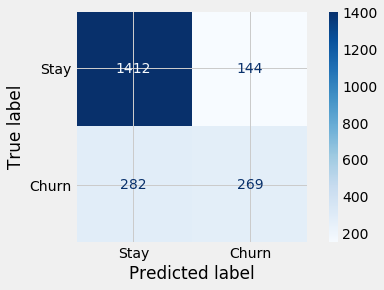

In [17]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

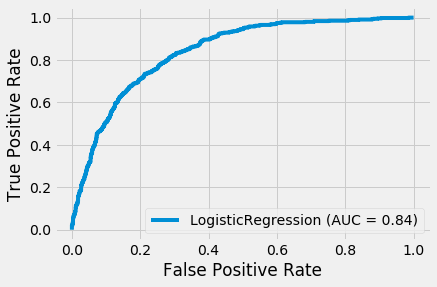

In [18]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)

# 2. Random Forest Classifier

In [20]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
churn = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Churning Rate: {churn * 100 :.2f}%")

Staying Rate: 73.42%
Churning Rate: 26.58%


In [35]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.72%
_______________________________________________
Classification Report:	Precision Score: 99.46%
			Recall Score: 99.46%
			F1 score: 99.46%
_______________________________________________
Confusion Matrix: 
 [[3601    7]
 [   7 1299]]

Test Result:
Accuracy Score: 78.93%
_______________________________________________
Classification Report:	Precision Score: 62.41%
			Recall Score: 48.82%
			F1 score: 54.79%
_______________________________________________
Confusion Matrix: 
 [[1394  162]
 [ 282  269]]



In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
rf_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min


In [ ]:
rf_grid_cv.best_estimator_

In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=15,
                                min_samples_leaf=1, 
                                min_samples_split=10,
                                n_estimators=500)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

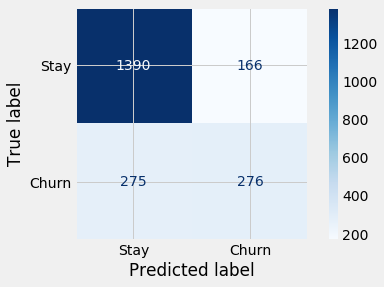

In [27]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

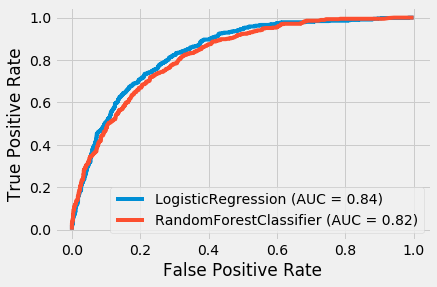

In [28]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)